In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("C:\Users\Professor\Desktop\precos_casa_california.csv")

In [2]:
cols = df.columns
#cols
#df.shape
df2 = df.replace({'NEAR BAY':0,'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'ISLAND': 4})
df2 = df2.apply(pd.to_numeric,errors='coerce')
df3 = df2.dropna(axis="rows")

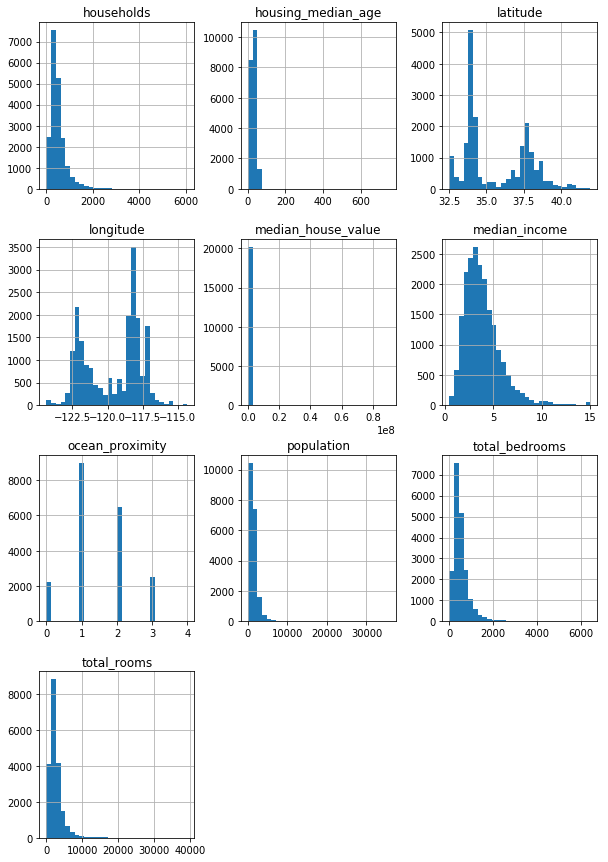

In [3]:
df3.hist(bins=30,figsize = (10,15))
plt.show()

In [4]:
df4=df3[df3['housing_median_age']<100]
#df4.shape
df5=df4[df4['total_bedrooms']<2200]
df5=df5[df5['total_bedrooms']>10]
#df5.shape
df6= df5[df5['total_rooms']<15000]
df6=df6[df6['total_rooms']>100]
#df6.shape
df7=df6[df6['population']>100]
df7=df7[df7['population']<6000]
#df7.shape
df8=df7[df7['households']>30]
df8=df8[df8['households']<2500]
#df8.shape
df9=df8[df8['median_house_value']>100]
df99=df9[df9['median_house_value']<50000000]
df10=df99[df99['median_income']>1]
df10.shape

(19559, 10)

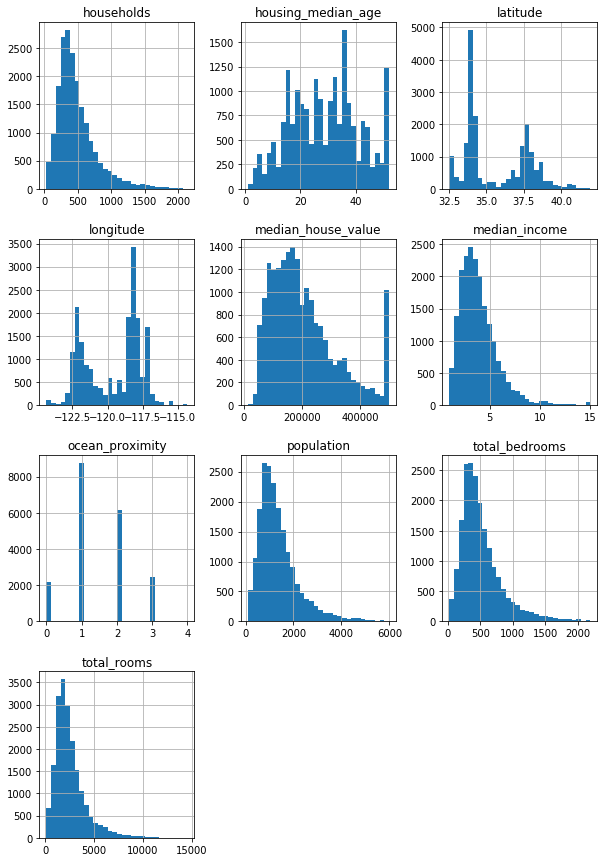

In [5]:
df10.hist(bins=30,figsize = (10,15))
plt.show()

In [6]:
#Objetivo: Encontrar um estimador para 
#prever o preço de casas 
#usando como base o dataset precos_casa_california.csv

In [7]:
dfy=df10['median_house_value']
dfy.shape
#dfy.hist(bins=30,figsize = (10,15))
#plt.show()

(19559L,)

In [8]:
dfx=df10.drop('median_house_value', axis=1)
dfx.shape
#dfx.hist(bins=30,figsize = (10,15))
#plt.show()

(19559, 9)

In [9]:
#treino e teste
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.33, random_state=42)

In [10]:
#validacao e teste
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [11]:
#models
model_linear = LinearRegression()
Boost = GradientBoostingRegressor()
Bag = BaggingRegressor()

In [12]:
#treinos
model_linear.fit(X_train,y_train)
Boost.fit(X_train,y_train)
Bag.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [13]:
#teste linear
print model_linear.score(X_train,y_train)
print model_linear.score(X_test,y_test)
print model_linear.score(X_val,y_val)    #validacao

0.6617522602005109
0.6782118384662476
0.6625944362978908


In [14]:
print Boost.score(X_train,y_train)
print Boost.score(X_test,y_test)
print Boost.score(X_val,y_val)

0.7942498715994526
0.7900989906927702
0.7763020660664302


In [15]:
print Bag.score(X_train,y_train)
print Bag.score(X_test,y_test)
print Bag.score(X_val,y_val)

0.9648194071260032
0.8082905452437366
0.80443754790614
